In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('bank_transactions.csv', encoding='ISO-8859-1')
print(df.head(10))


c:\Users\nazal\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   
5      TX000006   AC00393              92.15  2023-04-03 17:15:01   
6      TX000007   AC00199               7.08  2023-02-15 16:36:48   
7      TX000008   AC00069             171.42  2023-05-08 17:47:59   
8      TX000009   AC00135             106.23  2023-03-21 16:59:46   
9      TX000010   AC00385             815.96  2023-03-31 16:06:57   

  TransactionType       Location DeviceID       IP Address MerchantID Channel  \
0           Debit      San Diego  D000380   162.198.218.92       M015     ATM   
1           Debit        Houston  D000051      13.149.61.4       M052     ATM 

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('bank_transactions.csv', encoding='ISO-8859-1')
print(df.shape)

(2512, 16)


### clean data / removing


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [5]:
df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

### Remove Duplicates

In [6]:
df = df.drop_duplicates()
print(df.head(10))

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   
5      TX000006   AC00393              92.15  2023-04-03 17:15:01   
6      TX000007   AC00199               7.08  2023-02-15 16:36:48   
7      TX000008   AC00069             171.42  2023-05-08 17:47:59   
8      TX000009   AC00135             106.23  2023-03-21 16:59:46   
9      TX000010   AC00385             815.96  2023-03-31 16:06:57   

  TransactionType       Location DeviceID       IP Address MerchantID Channel  \
0           Debit      San Diego  D000380   162.198.218.92       M015     ATM   
1           Debit        Houston  D000051      13.149.61.4       M052     ATM 

### statistics 

In [7]:
print(df.describe())

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


###  Convert dates to datetime format

In [8]:
df[['TransactionDate', 'PreviousTransactionDate']] = df[['TransactionDate', 'PreviousTransactionDate']].apply(pd.to_datetime, errors='coerce')

In [9]:
print(df[['TransactionDate','PreviousTransactionDate']])


         TransactionDate PreviousTransactionDate
0    2023-04-11 16:29:14     2024-11-04 08:08:08
1    2023-06-27 16:44:19     2024-11-04 08:09:35
2    2023-07-10 18:16:08     2024-11-04 08:07:04
3    2023-05-05 16:32:11     2024-11-04 08:09:06
4    2023-10-16 17:51:24     2024-11-04 08:06:39
...                  ...                     ...
2507 2023-04-26 17:09:36     2024-11-04 08:11:29
2508 2023-03-22 17:36:48     2024-11-04 08:11:42
2509 2023-08-21 17:08:50     2024-11-04 08:08:39
2510 2023-02-24 16:24:46     2024-11-04 08:12:22
2511 2023-02-14 16:21:23     2024-11-04 08:07:49

[2512 rows x 2 columns]


### Correlation

In [10]:
numeric_data = df.select_dtypes(include='number')
correlation = numeric_data.corr()
print(correlation)


                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000  


### Correlation Heatmap

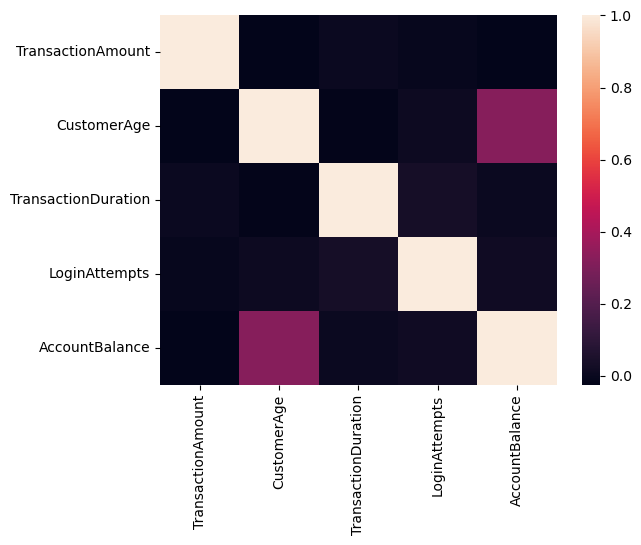

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation)
plt.show()

### Data Types

In [12]:
data_types = df.dtypes
data_types


TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object

### All Locations by Transaction Volume

Text(0, 0.5, 'Location')

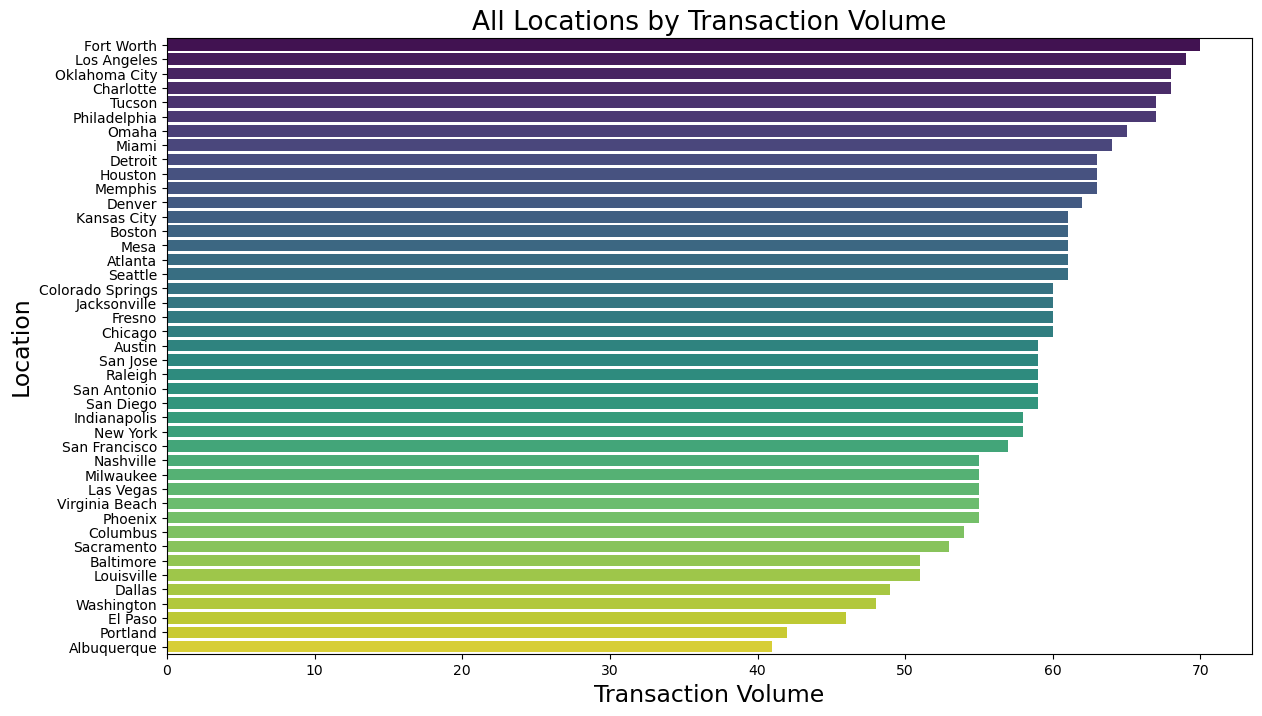

In [14]:
all_locations = df['Location'].value_counts().head(43)

plt.figure(figsize=(14,8))
sns.barplot(y=all_locations.index, x=all_locations.values, palette='viridis')
plt.title('All Locations by Transaction Volume', fontsize=19)
plt.xlabel('Transaction Volume', fontsize=17)
plt.ylabel('Location', fontsize=17)

### Histplot of Transaction Amount

c:\Users\nazal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


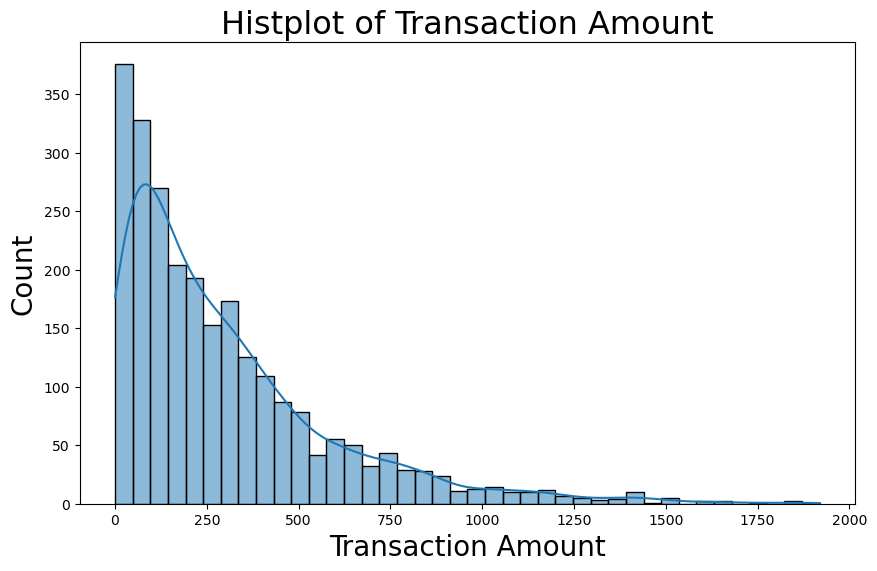

In [15]:
plt.figure(figsize=(10,6))

plt.xlabel("Transaction Amount", fontsize=20)
plt.ylabel("Count", fontsize=20)

plt.title("Histplot of Transaction Amount", fontsize=23)

sns.histplot(data=df, x="TransactionAmount", kde=True)

plt.show()

### Box Plot of Transaction Amount

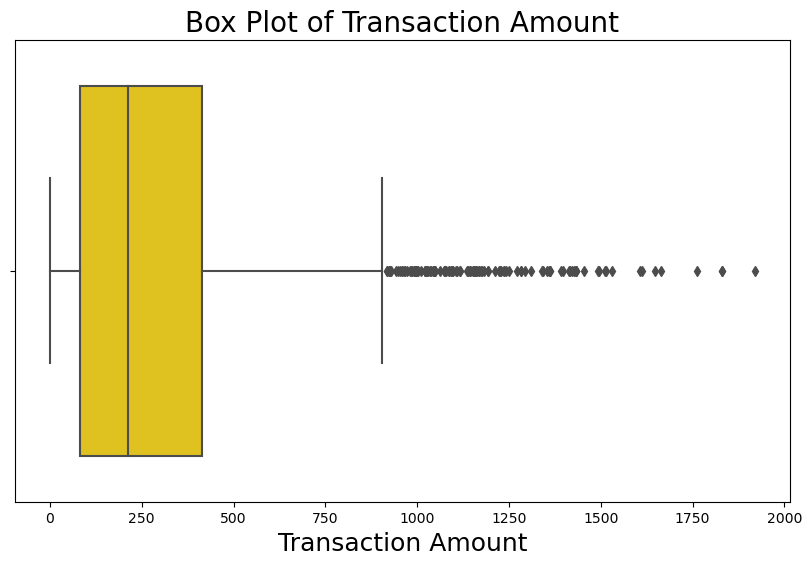

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['TransactionAmount'], color='gold')

plt.title('Box Plot of Transaction Amount', fontsize=20)
plt.xlabel('Transaction Amount', fontsize=18)

plt.show()

### TransactionType

In [17]:
df['TransactionType'].value_counts()

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

In [18]:
debitcard_counts = df[df['TransactionType']=='Debit']['TransactionType'].count()
creditcard_counts = df[df['TransactionType']=='Credit']['TransactionType'].count()

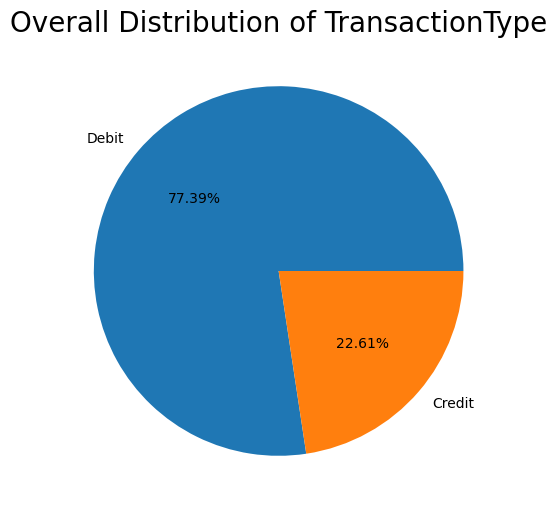

In [19]:
plt.figure(figsize=(10,6))

index_values = [debitcard_counts, creditcard_counts]
index_labels = ['Debit', 'Credit']

plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Distribution of TransactionType', fontsize=20)

plt.show()

### Overall Distribution of Transaction Location

In [20]:
location_counts = df['Location'].value_counts()
location_counts

Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Tucson              67
Philadelphia        67
Omaha               65
Miami               64
Detroit             63
Houston             63
Memphis             63
Denver              62
Kansas City         61
Boston              61
Mesa                61
Atlanta             61
Seattle             61
Colorado Springs    60
Jacksonville        60
Fresno              60
Chicago             60
Austin              59
San Jose            59
Raleigh             59
San Antonio         59
San Diego           59
Indianapolis        58
New York            58
San Francisco       57
Nashville           55
Milwaukee           55
Las Vegas           55
Virginia Beach      55
Phoenix             55
Columbus            54
Sacramento          53
Baltimore           51
Louisville          51
Dallas              49
Washington          48
El Paso             46
Portland            42
Albuquerque         41
Na

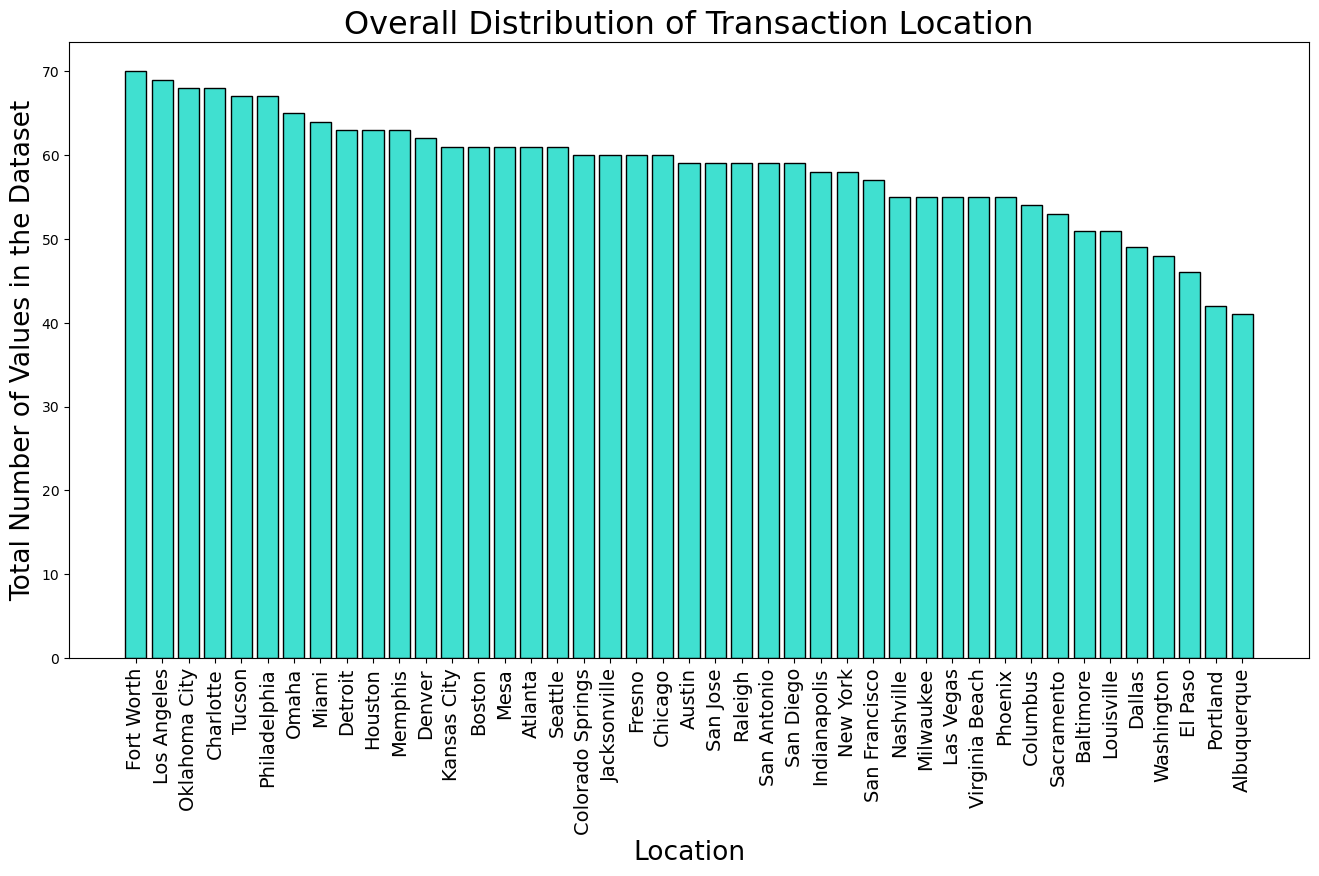

In [22]:
plt.figure(figsize=(16,8))

plt.bar(location_counts.index, location_counts.values, color='turquoise', edgecolor='black')

plt.xticks(location_counts.index, location_counts.index, rotation=90, fontsize=14)

plt.xlabel('Location', fontsize=19)
plt.ylabel('Total Number of Values in the Dataset', fontsize=19)

plt.title('Overall Distribution of Transaction Location', fontsize=23)

plt.show()

### Overall Distribution of User Type

In [23]:
df['Channel'].value_counts()


Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64

In [25]:
branch_counts = df[df['Channel']=='Branch']['Channel'].count()
atm_counts = df[df['Channel']=='ATM']['Channel'].count()
online_counts = df[df['Channel']=='Online']['Channel'].count()

branch_counts, atm_counts, online_counts

(868, 833, 811)

### Daily Transaction Counts

TransactionDay
2023-01-02    19
2023-01-03     9
2023-01-04     4
2023-01-05     8
2023-01-06     7
              ..
2023-12-26     5
2023-12-27     4
2023-12-28     7
2023-12-29     9
2024-01-01    13
Length: 261, dtype: int64


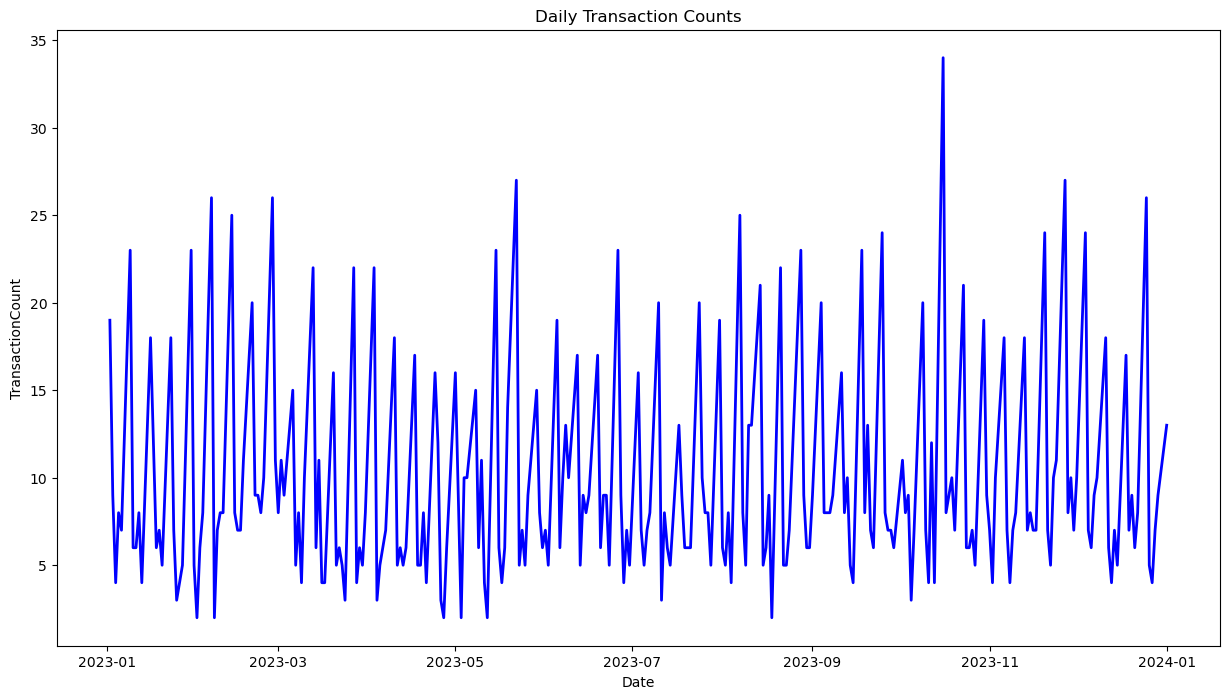

In [27]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionDay'] = df['TransactionDate'].dt.date
daily_counts = df.groupby('TransactionDay').size() 
print(daily_counts) 
plt.figure(figsize=(15,8))
daily_counts.plot(title='Daily Transaction Counts', color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('TransactionCount')
plt.show()

### Transactions by Day of the Week

0         Tuesday
1         Tuesday
2          Monday
3          Friday
4          Monday
          ...    
2507    Wednesday
2508    Wednesday
2509       Monday
2510       Friday
2511      Tuesday
Name: DayOfWeek, Length: 2512, dtype: object


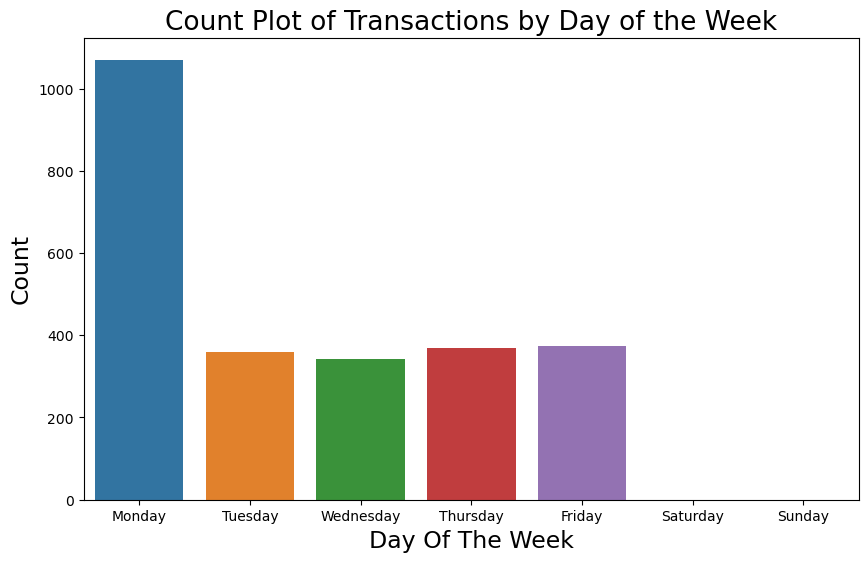

In [28]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()
print(df['DayOfWeek'])
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Count Plot of Transactions by Day of the Week', fontsize=19)
plt.xlabel('Day Of The Week', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.show()